#  Flight Delay Prediction Using Machine Learning

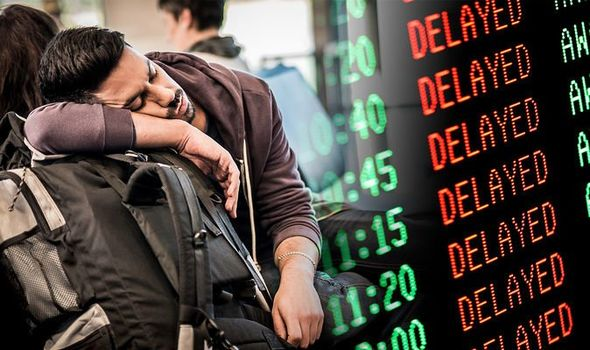

## Defining Why?
Flight delays has become a very important consideration for air transportation all over the world because of the associated financial loses that the aviation industry is going through. These delays not only cause inconvenience to the airlines but for the passengers also and results in a increase in travel time which increases the expenses and ultimately causes stress and hassle among the passengers and operations insufficiency in Business. So the primary goal of this project is to collect and analyse the data. Provide insights from data to Business Stakeholders and help them for making a well-assessed decision to increase operation efficiency and growth in business. Alongside building a predictive machine learning model to reduce inconvenience happens to passengers while travelling.


## Data
The dataset come from the website of bureau of transportation and statistics United States (www.bts.gov) OR you can get it on kaggle also. 
The dataset provide information about flight records per airline across United States.
which include 28 features and around 50.7 milion rows.  

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('E:/DBDA/Project/2017.csv')

In [5]:
df.shape

(5674621, 28)

In [6]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01,AA,1,JFK,LAX,800,831.0,31.0,25.0,856.0,...,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,NaN
1,2017-01-01,AA,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,...,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,NaN
2,2017-01-01,AA,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,...,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,NaN
3,2017-01-01,AA,5,DFW,HNL,1135,1252.0,77.0,19.0,1311.0,...,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,NaN
4,2017-01-01,AA,6,OGG,DFW,1855,1855.0,0.0,16.0,1911.0,...,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,NaN


In [7]:
df.dtypes

FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtype: object

### Setting up date column as index and filling the missing values with Nan

In [8]:
df = pd.read_csv('E:/DBDA/Project/2017.csv',parse_dates=['FL_DATE'],na_values=[" "])

# ---------------------------------------------------------------------------------------------------------------
## Features
FL_DATE = Date of the Flight\
OP_CARRIER = Airline Identifier\
OP_CARRIER_FL_NUM = Flight Number\
ORIGIN = Starting Airport Code\
DEST = Destination Airport Code\
CRS_DEP_TIME = Planned Departure Time\
DEP_TIME = Actual Departure Time\
DEP_DELAY = Total Delay on Departure in minutes\
TAXI_OUT = The time duration elapsed between departure from the origin airport gate and wheels off\
WHEELS_OFF = The time point that the aircraft's wheels leave the ground\
WHEELS_ON = The time point that the aircraft'ss wheels touch on the ground\
TAXI_IN = The time duration elapsed between wheels-on and gate arrival at the destination airport\
CRS_ARR_TIME = Planned arrival time\
ARR_TIME = Actual Arrival Time = ARRIVAL_TIME - SCHEDULED_ARRIVAL\
ARR_DELAY = Total Delay on Arrival in minutes\
CANCELLED = Flight Cancelled (1 = cancelled)\
CANCELLATION_CODE = Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C -National
Air System; D - Security\
DIVERTED = Aircraft landed on different airport that the one scheduled\
CRS_ELAPSED_TIME = Planned time amount needed for the flight trip\
ACTUAL_ELAPSED_TIME = AIR_TIME+TAXI_IN+TAXI_OUT\
AIR_TIME = The time duration between wheels_off and wheels_on time\
DISTANCE = Distance between two airports\
CARRIER_DELAY = Delay caused by the airline in minutes\
WEATHER_DELAY = Delay caused by weather\
NAS_DELAY = Delay caused by air system\
SECURITY_DELAY = caused by security reasons\
LATE_AIRCRAFT_DELAY = Delay caused by security\

# --------------------------------------------------------------------------------------------------------------
## Target Feature 1
ARR_DELAY is our Target Feature. 
which gives information like flight is delayed or it arrived before scheduled arrival time and 
if it delayed then by how much time and arrived early then by how much time.

## Target Feature 2 
We are creating another target variable (Binary Classification) from ARR_DELAY\
If ARR_DELAY having value equal to 0 or less than 0 then there is not delayed flight =0\
If ARR_DELAY having value greater than 0 then it consider to be a delayed flight     =1
 

In [9]:
delay = []

for i in df['ARR_DELAY']:
    if i<= 0:
        delay.append(0)  # No delay
    else:
        delay.append(1)  #delay
df['Target']= delay

In [10]:
df['Target'].unique()

array([1, 0], dtype=int64)

In [11]:
Targets=df[["ARR_DELAY", "Target"]]
Targets.head(10)

,ARR_DELAY,Target
0,27.0,1
1,42.0,1
2,42.0,1
3,97.0,1
4,42.0,1
5,394.0,1
6,58.0,1
7,-22.0,0
8,-30.0,0
9,-24.0,0


## Exploratory Data Analysis

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [13]:
df.OP_CARRIER.value_counts()

WN    1329444
DL     923560
AA     896348
OO     706527
UA     584481
EV     339541
B6     298654
AS     185068
NK     156818
F9     103027
HA      80172
VX      70981
Name: OP_CARRIER, dtype: int64

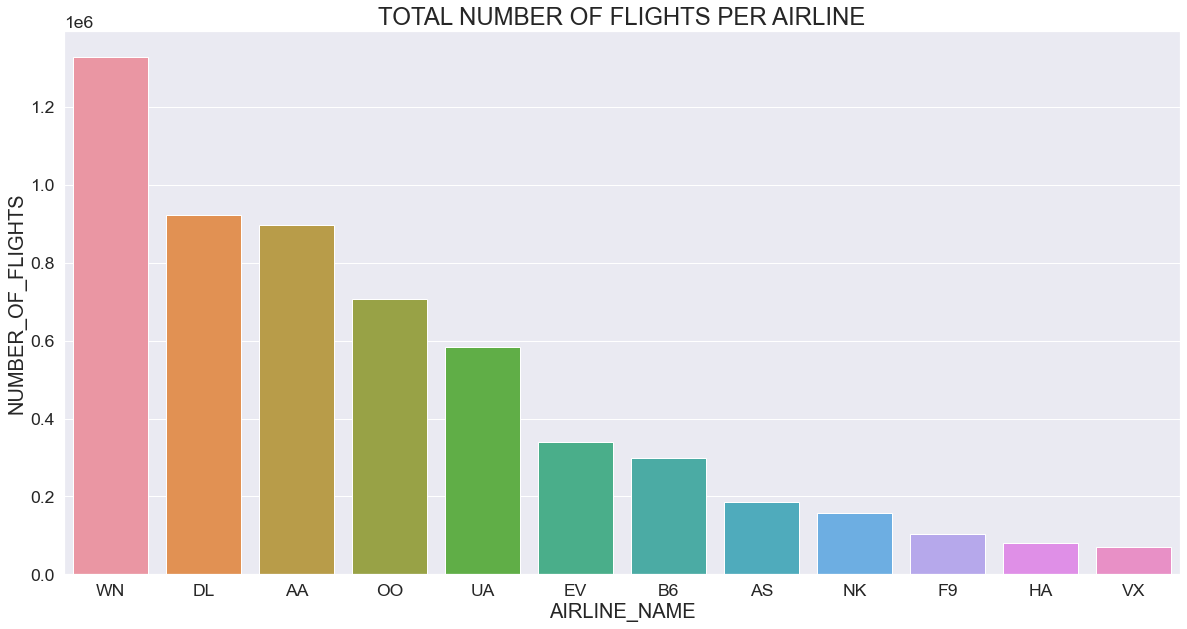

In [14]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['OP_CARRIER'], data=df, order=df['OP_CARRIER'].value_counts().iloc[0:18].index)
plt.title('TOTAL NUMBER OF FLIGHTS PER AIRLINE', fontsize=24)
plt.xlabel('AIRLINE_NAME', fontsize=20)
plt.ylabel('NUMBER_OF_FLIGHTS', fontsize=20)
plt.show()

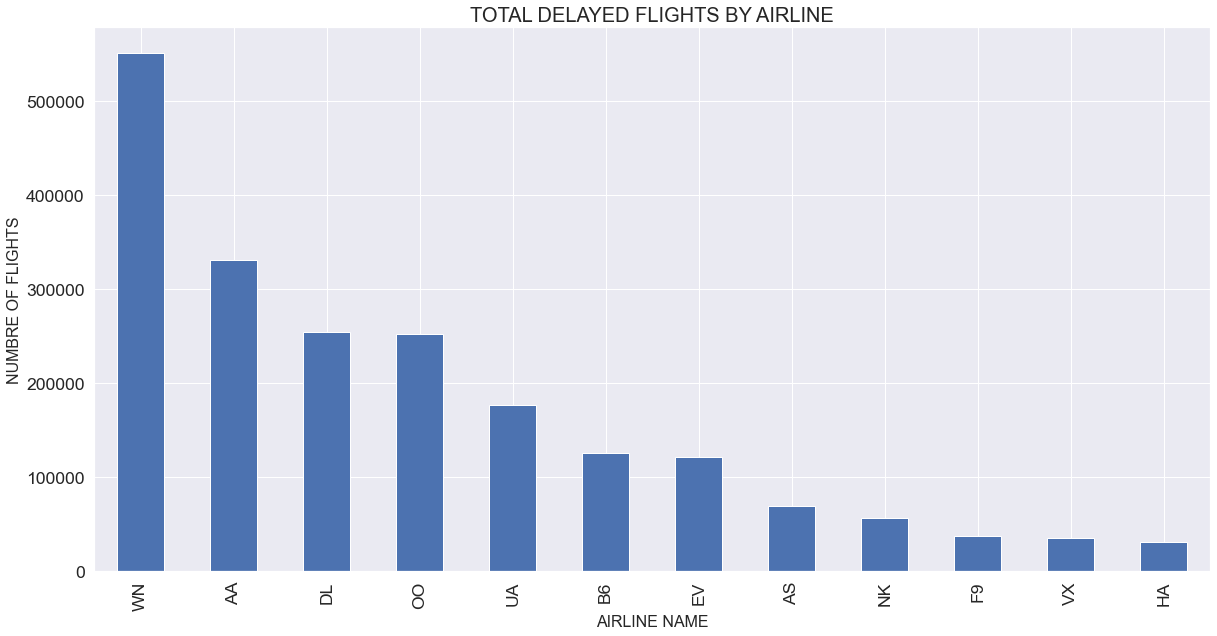

In [15]:
plt.figure(figsize=(20, 10))
df.groupby('OP_CARRIER').Target.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.show()

##  Top 5 Airlines With The Most Numer of Delayed Flights

### 1)SouthWest Airlines
### 2)American Airlines
### 3)Delta Airlines
### 4)SkyWest Airlines
### 5)United Airlines, Inc.
# ---------------------------------------------------------------------------------------------------------------

## Overall Percentage of Delayed Flight 


In [16]:
df.Target.value_counts(normalize=True)

0    0.640547
1    0.359453
Name: Target, dtype: float64

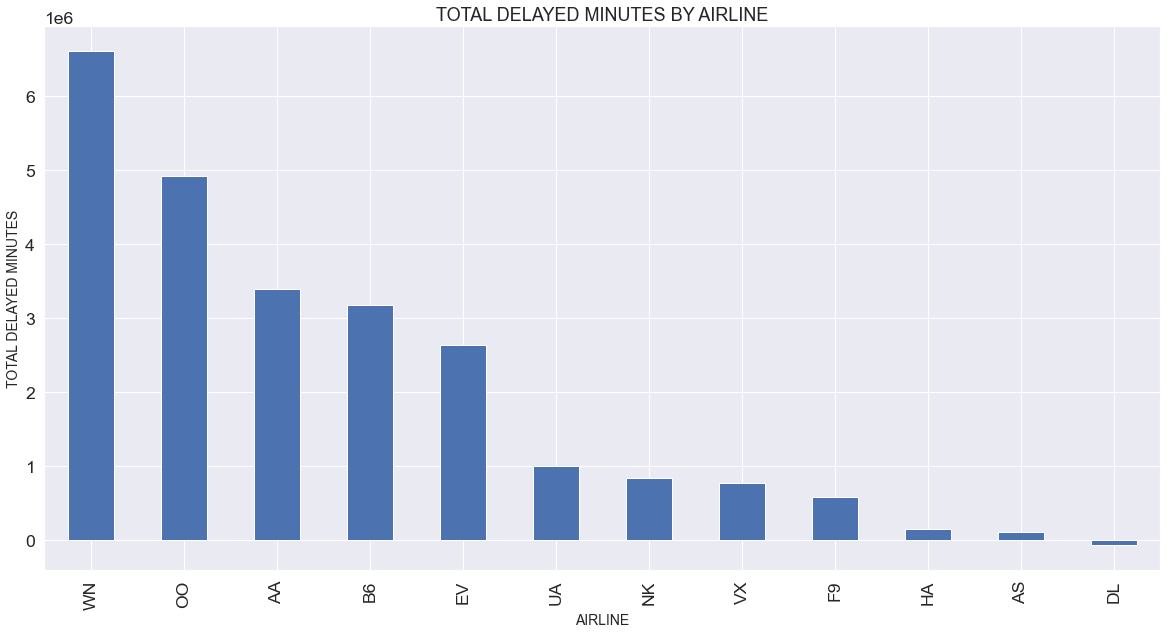

In [17]:
plt.figure(figsize=(20, 10))
df.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)
plt.show()

### With reference of above plots we come to know that B6 (JetBlue Airways) operates less number of flights as compare to others(Top 5) . Alongwith there flights are delayed also in large number as compare to other 4 flight operators. So passengers must be cautitious while selecting the airlines. 

In [18]:
df.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False)

OP_CARRIER
WN    6605883.0
OO    4915343.0
AA    3397217.0
B6    3179289.0
EV    2637578.0
UA    1002713.0
NK     845576.0
VX     776922.0
F9     578573.0
HA     152194.0
AS     115451.0
DL     -68220.0
Name: ARR_DELAY, dtype: float64

# Data Preprocessing 

In [19]:
df.dtypes

FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM               int64
ORIGIN                         object
DEST                           object
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
CANCELLED                     float64
CANCELLATION_CODE              object
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                      float64
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAF

## Dealing With Null Values and Object Type Data

#### There are total 4 features which have object datatype
1)OP_CARRIER\
2)ORIGIN\
3)DEST\
4)CANCELLATION_CODE

#### We are going to drop those feature because, like CANCELLATION_CODE is for the flights who get cancelled so there is no sense to predict the delay for allready cancelled flight. and we wont found any impactfull relation of other 3 features with target variable thats why we decided to drop those features.

In [20]:
df = df.select_dtypes(exclude=['object'])

In [21]:
print('The current shape of df is:', df.shape)

The current shape of df is: (5674621, 25)


In [22]:
#Checking columns which are having all null values.
df.isnull().all()

FL_DATE                False
OP_CARRIER_FL_NUM      False
CRS_DEP_TIME           False
DEP_TIME               False
DEP_DELAY              False
TAXI_OUT               False
WHEELS_OFF             False
WHEELS_ON              False
TAXI_IN                False
CRS_ARR_TIME           False
ARR_TIME               False
ARR_DELAY              False
CANCELLED              False
DIVERTED               False
CRS_ELAPSED_TIME       False
ACTUAL_ELAPSED_TIME    False
AIR_TIME               False
DISTANCE               False
CARRIER_DELAY          False
WEATHER_DELAY          False
NAS_DELAY              False
SECURITY_DELAY         False
LATE_AIRCRAFT_DELAY    False
Unnamed: 27             True
Target                 False
dtype: bool

In [23]:
#Droping all null values column
df.drop('Unnamed: 27',inplace=True,axis=1)

In [24]:
print('The current shape of df is:', df.shape)

The current shape of df is: (5674621, 24)


## Handelling the Missing Values

In [25]:
df1=df.isnull().sum()/df.shape[0]*100
df1

FL_DATE                 0.000000
OP_CARRIER_FL_NUM       0.000000
CRS_DEP_TIME            0.000000
DEP_TIME                1.415213
DEP_DELAY               1.415830
TAXI_OUT                1.447586
WHEELS_OFF              1.447515
WHEELS_ON               1.492153
TAXI_IN                 1.492153
CRS_ARR_TIME            0.000000
ARR_TIME                1.492153
ARR_DELAY               1.677839
CANCELLED               0.000000
DIVERTED                0.000000
CRS_ELAPSED_TIME        0.000123
ACTUAL_ELAPSED_TIME     1.677839
AIR_TIME                1.677839
DISTANCE                0.000000
CARRIER_DELAY          81.858295
WEATHER_DELAY          81.858295
NAS_DELAY              81.858295
SECURITY_DELAY         81.858295
LATE_AIRCRAFT_DELAY    81.858295
Target                  0.000000
dtype: float64

In [26]:
df.drop(['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'],axis=1,inplace=True)

In [27]:
print('The current shape of df is:', df.shape)

The current shape of df is: (5674621, 19)


###  Here we have deleted the rows of column CANCELLED = 1(yes) and DIVERTED = 1(yes). As there is no sense to predict the flight delays for allready cancelled and diverted flights, and these features wont be helpfull for the further delay predictions.

In [28]:
df = df[df.CANCELLED != 1]

In [29]:
df.CANCELLED.unique()

array([0.])

In [30]:
df['CANCELLED']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
5674616    0.0
5674617    0.0
5674618    0.0
5674619    0.0
5674620    0.0
Name: CANCELLED, Length: 5591928, dtype: float64

In [31]:
df.DIVERTED.value_counts(normalize=True)

0.0    0.997762
1.0    0.002238
Name: DIVERTED, dtype: float64

In [32]:
df = df[df.DIVERTED != 1]

In [33]:
df.DIVERTED.unique()

array([0.])

In [34]:
print('The current shape of df is:', df.shape)

The current shape of df is: (5579411, 19)


## Handelling the NA Values

In [35]:
#Min one na value is present or not in columns
df.columns[df.isna().any()]

Index(['WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME'],
      dtype='object')

In [36]:
for col in df.columns[df.isnull().any()]:
    df[col].fillna(df[col].mode()[0],inplace=True)
df.columns[df.isnull().any()]

Index([], dtype='object')

In [37]:
df.tail(3)

,FL_DATE,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Target
5674618,2017-12-31,2426,1335,1334.0,-1.0,9.0,1343.0,1627.0,10.0,1649,1637.0,-12.0,0.0,0.0,134.0,123.0,104.0,846.0,0
5674619,2017-12-31,2427,1115,1107.0,-8.0,11.0,1118.0,1224.0,15.0,1254,1239.0,-15.0,0.0,0.0,99.0,92.0,66.0,414.0,0
5674620,2017-12-31,2429,1510,1612.0,62.0,28.0,1640.0,1827.0,11.0,1740,1838.0,58.0,0.0,0.0,270.0,266.0,227.0,1605.0,1


In [38]:
print('The current shape of df is:', df.shape)

The current shape of df is: (5579411, 19)


In [39]:
df.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Target
count,5.579411e+06,5.579411e+06,5.579411e+06,5.579411e+06,5.579411e+06,5.579411e+06,5.579411e+06,5.579411e+06,5.579411e+06,5.579411e+06,5.579411e+06,5579411.0,5579411.0,5.579411e+06,5.579411e+06,5.579411e+06,5.579411e+06,5.579411e+06
mean,2.140945e+03,1.329295e+03,1.333554e+03,9.660004e+00,1.677324e+01,1.355714e+03,1.464533e+03,7.503593e+00,1.488773e+03,1.468864e+03,4.326354e+00,0.0,0.0,1.470961e+02,1.417624e+02,1.174856e+02,8.577553e+02,3.485221e-01
std,1.736114e+03,4.906769e+02,5.043684e+02,4.364255e+01,9.354558e+00,5.062074e+02,5.337251e+02,5.900622e+00,5.187057e+02,5.380714e+02,4.586481e+01,0.0,0.0,7.720667e+01,7.666672e+01,7.427620e+01,6.251975e+02,4.765023e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,-2.340000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.380000e+02,0.0,0.0,1.000000e+00,1.500000e+01,7.000000e+00,3.100000e+01,0.000000e+00
25%,7.360000e+02,9.110000e+02,9.140000e+02,-5.000000e+00,1.100000e+01,9.290000e+02,1.046000e+03,4.000000e+00,1.103000e+03,1.050000e+03,-1.500000e+01,0.0,0.0,9.000000e+01,8.500000e+01,6.200000e+01,3.920000e+02,0.000000e+00
50%,1.678000e+03,1.320000e+03,1.327000e+03,-2.000000e+00,1.400000e+01,1.340000e+03,1.506000e+03,6.000000e+00,1.519000e+03,1.510000e+03,-6.000000e+00,0.0,0.0,1.280000e+02,1.230000e+02,9.800000e+01,6.800000e+02,0.000000e+00
75%,3.056000e+03,1.735000e+03,1.743000e+03,6.000000e+00,2.000000e+01,1.758000e+03,1.913000e+03,9.000000e+00,1.920000e+03,1.918000e+03,7.000000e+00,0.0,0.0,1.800000e+02,1.750000e+02,1.490000e+02,1.102000e+03,1.000000e+00
max,8.402000e+03,2.359000e+03,2.400000e+03,2.208000e+03,1.830000e+02,2.400000e+03,2.400000e+03,4.140000e+02,2.359000e+03,2.400000e+03,2.189000e+03,0.0,0.0,7.180000e+02,7.840000e+02,7.120000e+02,4.983000e+03,1.000000e+00


In [40]:
df.corr()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Target
OP_CARRIER_FL_NUM,1.000000,0.025994,0.032163,0.017513,0.026408,0.037507,0.023460,-0.059620,0.018033,0.025210,0.023880,NaN,NaN,-0.276257,-0.273886,-0.281290,-0.288135,0.007945
CRS_DEP_TIME,0.025994,1.000000,0.957699,0.104957,0.005439,0.928541,0.617815,-0.046558,0.664451,0.589828,0.093239,NaN,NaN,-0.010273,-0.014315,-0.011762,-0.005767,0.119811
DEP_TIME,0.032163,0.957699,1.000000,0.139065,0.014363,0.968308,0.642127,-0.042789,0.671172,0.613183,0.128410,NaN,NaN,-0.015997,-0.018455,-0.017459,-0.013877,0.151838
DEP_DELAY,0.017513,0.104957,0.139065,1.000000,0.067262,0.130064,0.036142,0.008980,0.090403,0.028140,0.957053,NaN,NaN,0.018512,0.021932,0.013453,0.013710,0.405987
TAXI_OUT,0.026408,0.005439,0.014363,0.067262,1.000000,0.037911,0.033759,0.030681,0.030836,0.030735,0.217205,NaN,NaN,0.126311,0.218851,0.097515,0.082884,0.285625
WHEELS_OFF,0.037507,0.928541,0.968308,0.130064,0.037911,1.000000,0.664665,-0.040133,0.684491,0.635549,0.124306,NaN,NaN,-0.023609,-0.023452,-0.025793,-0.025109,0.154445
WHEELS_ON,0.023460,0.617815,0.642127,0.036142,0.033759,0.664665,1.000000,-0.002361,0.861469,0.966401,0.036098,NaN,NaN,0.017625,0.018770,0.015310,0.010318,0.094163
TAXI_IN,-0.059620,-0.046558,-0.042789,0.008980,0.030681,-0.040133,-0.002361,1.000000,-0.002327,0.002318,0.102383,NaN,NaN,0.133722,0.190801,0.113636,0.104900,0.141285
CRS_ARR_TIME,0.018033,0.664451,0.671172,0.090403,0.030836,0.684491,0.861469,-0.002327,1.000000,0.853921,0.082853,NaN,NaN,0.028145,0.026447,0.023599,0.019681,0.106788
ARR_TIME,0.025210,0.589828,0.613183,0.028140,0.030735,0.635549,0.966401,0.002318,0.853921,1.000000,0.028046,NaN,NaN,0.015373,0.016242,0.012709,0.007318,0.085086


## Colinearity Check

<AxesSubplot:>

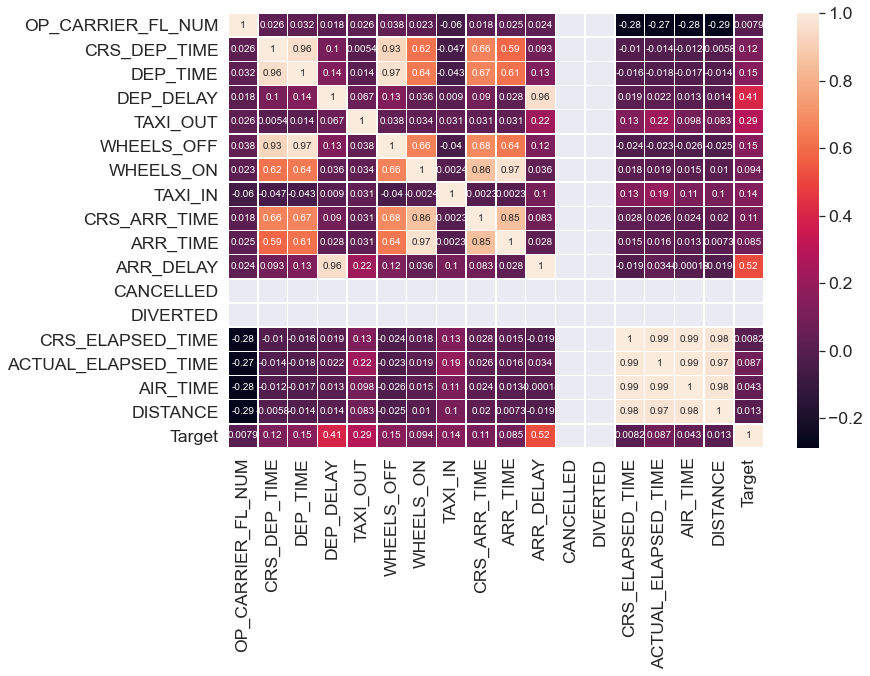

In [41]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(12,8))  
sns.heatmap(df.corr(),linewidths=.5,ax=ax,annot=True,annot_kws={'size': 10})

#### Dropping the CANCELLED and DIVERTED feature because from HeatMap and collinearity check we conclude that there is no meaningful relation between this 2 and other available features, So we decided to drop those two features.

In [42]:
df.drop(['CANCELLED','DIVERTED'],axis=1,inplace=True)

In [43]:
print('The current shape of df is:', df.shape)

The current shape of df is: (5579411, 17)


In [44]:
df.dtypes

FL_DATE                datetime64[ns]
OP_CARRIER_FL_NUM               int64
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                      float64
Target                          int64
dtype: object

In [45]:
df.set_index('FL_DATE')

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Target
FL_DATE,,,,,,,,,,,,,,,,
2017-01-01,1,800,831.0,31.0,25.0,856.0,1143.0,26.0,1142,1209.0,27.0,402.0,398.0,347.0,2475.0,1
2017-01-01,2,900,934.0,34.0,34.0,1008.0,1757.0,12.0,1727,1809.0,42.0,327.0,335.0,289.0,2475.0,1
2017-01-01,4,1130,1221.0,51.0,20.0,1241.0,2025.0,15.0,1958,2040.0,42.0,328.0,319.0,284.0,2475.0,1
2017-01-01,5,1135,1252.0,77.0,19.0,1311.0,1744.0,5.0,1612,1749.0,97.0,517.0,537.0,513.0,3784.0,1
2017-01-01,6,1855,1855.0,0.0,16.0,1911.0,631.0,11.0,600,642.0,42.0,425.0,467.0,440.0,3711.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,2421,750,744.0,-6.0,14.0,758.0,849.0,4.0,916,853.0,-23.0,206.0,189.0,171.0,1222.0,0
2017-12-31,2425,1611,1602.0,-9.0,12.0,1614.0,1753.0,12.0,1821,1805.0,-16.0,190.0,183.0,159.0,1120.0,0
2017-12-31,2426,1335,1334.0,-1.0,9.0,1343.0,1627.0,10.0,1649,1637.0,-12.0,134.0,123.0,104.0,846.0,0


# Modelling
## Decision Tree (Classifier)

In [46]:
#Decision Tree for Classification
Y = df['Target']   #Testing data
X = df.drop(['Target','FL_DATE'],axis=1) #Train 

In [47]:
X.shape,Y.shape

((5579411, 15), (5579411,))

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state =7)

In [49]:
X_train.shape,X_test.shape

((3905587, 15), (1673824, 15))

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=7)

In [52]:
model.score(X_test,Y_test)

0.9999994025656221

In [53]:
pred= model.predict(X_test) #Accuracy
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

[[1090826       1]
 [      0  582997]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1090827
           1       1.00      1.00      1.00    582997

    accuracy                           1.00   1673824
   macro avg       1.00      1.00      1.00   1673824
weighted avg       1.00      1.00      1.00   1673824



In [55]:
df2 = pd.DataFrame({'Actual':Y_test,'Delay/No_Delay':pred})
df2

,Actual,Delay/No_Delay
4429905,0,0
340258,0,0
4363275,0,0
2563623,0,0
4098989,0,0
...,...,...
1056306,0,0
4812823,0,0
4649165,0,0
354559,0,0


## Decision Tree (Regressor)

In [56]:
Y1 = df['ARR_DELAY']
X1 = df.drop(['Target','FL_DATE','ARR_DELAY'],axis=1)

In [57]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size = 0.3,random_state =7)

In [58]:
X1_train.shape,X1_test.shape

((3905587, 14), (1673824, 14))

In [59]:
from sklearn.tree import DecisionTreeRegressor
model_reg = DecisionTreeRegressor(random_state=7)
model_reg.fit(X1_train,Y1_train)

DecisionTreeRegressor(random_state=7)

In [60]:
model_reg.score(X1_test,Y1_test)

0.9949051941684214

In [61]:
pred1 = model_reg.predict(X1_test)
pred1

array([ -4.,  -3.,   0., ...,  -3., -15., -17.])

In [62]:
df3 = pd.DataFrame({'Actual':Y1_test,'Predicted':pred1})
df3.tail(20)

,Actual,Predicted
1390887,-9.0,-9.0
2775323,-20.0,-20.0
4127958,19.0,19.0
2173009,-14.0,-14.0
4362732,-30.0,-29.0
652116,57.0,60.0
1669628,-21.0,-21.0
4306366,-19.0,-19.0
3625714,22.0,22.0
3730946,-19.0,-19.0


## Random Forest (Classifier)

In [63]:
from sklearn.ensemble import RandomForestClassifier
model_Class = RandomForestClassifier(random_state=7)
model_Class.fit(X_train, Y_train)

RandomForestClassifier(random_state=7)

In [64]:
model_Class.score(X_test,Y_test)

1.0

In [65]:
pred2=model_Class.predict(X_test)
pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, pred2))
print(classification_report(Y_test, pred2))

[[1090827       0]
 [      0  582997]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1090827
           1       1.00      1.00      1.00    582997

    accuracy                           1.00   1673824
   macro avg       1.00      1.00      1.00   1673824
weighted avg       1.00      1.00      1.00   1673824



In [67]:
df4 = pd.DataFrame({'Actual':Y_test,'Predicted':pred2})
df4

,Actual,Predicted
4429905,0,0
340258,0,0
4363275,0,0
2563623,0,0
4098989,0,0
...,...,...
1056306,0,0
4812823,0,0
4649165,0,0
354559,0,0


## Random Forest  (Regressor)

In [68]:
from sklearn.ensemble import RandomForestRegressor
model_reg1 = RandomForestRegressor(n_estimators=50)

In [71]:
model_reg1.fit(X1_train, Y1_train)

RandomForestRegressor(n_estimators=50)

In [72]:
model_reg1.score(X1_test,Y1_test) #0.990377 for 5 estimators,#0.990627 for 10 estimators,#0.9915785 for 25 estimators#0.99777786 for 50 estimators

0.9977778635680423

In [73]:
pred3 = model_reg1.predict(X1_test)
pred3

array([ -4.  ,  -2.04,   0.  , ...,  -3.  , -15.1 , -16.3 ])

In [74]:
df5 = pd.DataFrame({'Actual':Y1_test,'Predicted':pred3})
df5

,Actual,Predicted
4429905,-4.0,-4.00
340258,-3.0,-2.04
4363275,0.0,0.00
2563623,-23.0,-23.00
4098989,-1.0,-1.00
...,...,...
1056306,-16.0,-15.64
4812823,-18.0,-17.72
4649165,-3.0,-3.00
354559,-15.0,-15.10


In [75]:
df5.tail(20)

,Actual,Predicted
1390887,-9.0,-9.10
2775323,-20.0,-20.08
4127958,19.0,18.26
2173009,-14.0,-14.00
4362732,-30.0,-30.90
652116,57.0,57.46
1669628,-21.0,-21.00
4306366,-19.0,-19.00
3625714,22.0,22.06
3730946,-19.0,-19.00


In [76]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.


## Parameter tuning

In [77]:
param ={
    'criterion' :['gini', 'entropy'],  
   'max_depth':[1,2,3,4,5,None]        #max split
}

In [78]:
from sklearn.model_selection import GridSearchCV
GCV_grid=GridSearchCV(estimator=model,param_grid=param,cv=10,verbose=2)

In [79]:
GCV_grid.fit(X_train, Y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=16.8min
[CV] criterion=gini, max_depth=1 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.8min remaining:    0.0s


[CV] ...................... criterion=gini, max_depth=1, total=  11.5s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=  11.3s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=  11.2s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=  11.1s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=  11.3s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=  11.3s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=  11.2s
[CV] criterion=gini, max_depth=1 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 48.9min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None]},
             verbose=2)

In [80]:
print(GCV_grid.best_params_)
print(GCV_grid.cv_results_['mean_test_score'])

{'criterion': 'gini', 'max_depth': 1}
[0.99999974 0.99999974 0.99999974 0.99999949 0.99999949 0.99999949
 0.99999974 0.99999974 0.99999974 0.99999949 0.99999949 0.99999949]


##Parameter tuning for Random Forest

In [69]:
param1 ={
    'n_estimators':[10,50,100],
    'criterion' :['gini', 'entropy'],   #how many decision tree to keep
   'max_depth':[1,2,3,4,5,None]        #max split
}

In [70]:
from sklearn.model_selection import GridSearchCV
GCV_grid1=GridSearchCV(estimator=model_Class,param_grid=param1,cv=5,verbose=1)

In [71]:
GCV_grid1.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 973.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

In [72]:
print(GCV_grid1.best_params_)
print(GCV_grid1.cv_results_['mean_test_score'])

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}
[0.96102481 0.90858711 0.88651744 0.99995186 0.96677708 0.9645536
 0.99948868 0.99467916 0.99999974 0.97478381 0.99954783 0.99999974
 0.99999974 0.99999974 0.99999974 0.99999974 0.99999974 0.99999974
 0.95715164 0.90410635 0.88225662 0.99986865 0.9699067  0.97111753
 0.99970248 0.99618444 0.99999974 0.9856398  0.99994726 0.99999974
 0.99999974 0.99999974 0.99999974 0.99999974 0.99999974 0.99999974]
